# "Sweet Insights: A Statistical Exploration of Apple Quality Using Python"


Attributes:
- A_id: Unique identifier for each fruit
- Size: Size of the fruit
- Weight: Weight of the fruit
- Sweetness: Degree of sweetness of the fruit
- Crunchiness: Texture indicating the crunchiness of the fruit
- Juiciness: Level of juiciness of the fruit
- Ripeness: Stage of ripeness of the fruit
- Acidity: Acidity level of the fruit
- Quality: Overall quality of the fruit

Data Source: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality



# Importing Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

# Load dataset

In [4]:
data = pd.read_csv('/content/apple_quality.csv')
data.head()

NameError: name 'pd' is not defined

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
#Convert Acidity to Numerical
data['Acidity'] = pd.to_numeric(data['Acidity'], errors = 'coerce')
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [ ]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

# Statistical Summary

In [ ]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


#Descriptive Statistics

In [ ]:
df = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness','Ripeness', 'Acidity']

ds = pd.DataFrame({
    'Mean': data[df].mean(),
    'Median': data[df].median(),
    'Mode': data[df].mode().iloc[0],
    'Standard Deviation': data[df].std(),
    'Variance': data[df].var(),
    'Skewness': data[df].skew(),
    'Kurtosis': data[df].kurt()

})

ds

,Mean,Median,Mode,Standard Deviation,Variance,Skewness,Kurtosis
Size,-0.503015,-0.513703,-7.151703,1.928059,3.717410,-0.002437,-0.083341
Weight,-0.989547,-0.984736,-7.149848,1.602507,2.568029,0.003102,0.359050
Sweetness,-0.470479,-0.504758,-6.894485,1.943441,3.776962,0.083850,0.014472
Crunchiness,0.985478,0.998249,-6.055058,1.402757,1.967728,0.000230,0.722020
Juiciness,0.512118,0.534219,-5.961897,1.930286,3.726003,-0.113421,0.028735
Ripeness,0.498277,0.503445,-5.864599,1.874427,3.513476,-0.008764,-0.071850
Acidity,0.076877,0.022609,-7.010538,2.110270,4.453238,0.055783,-0.093451


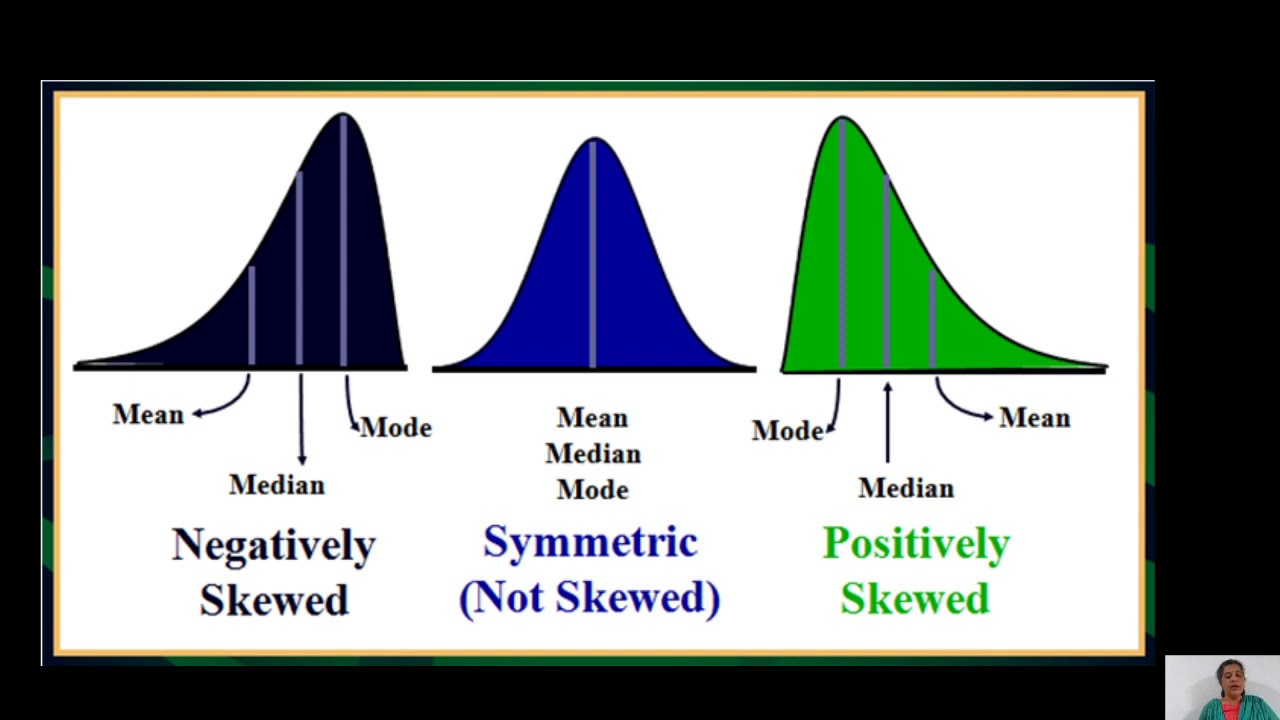

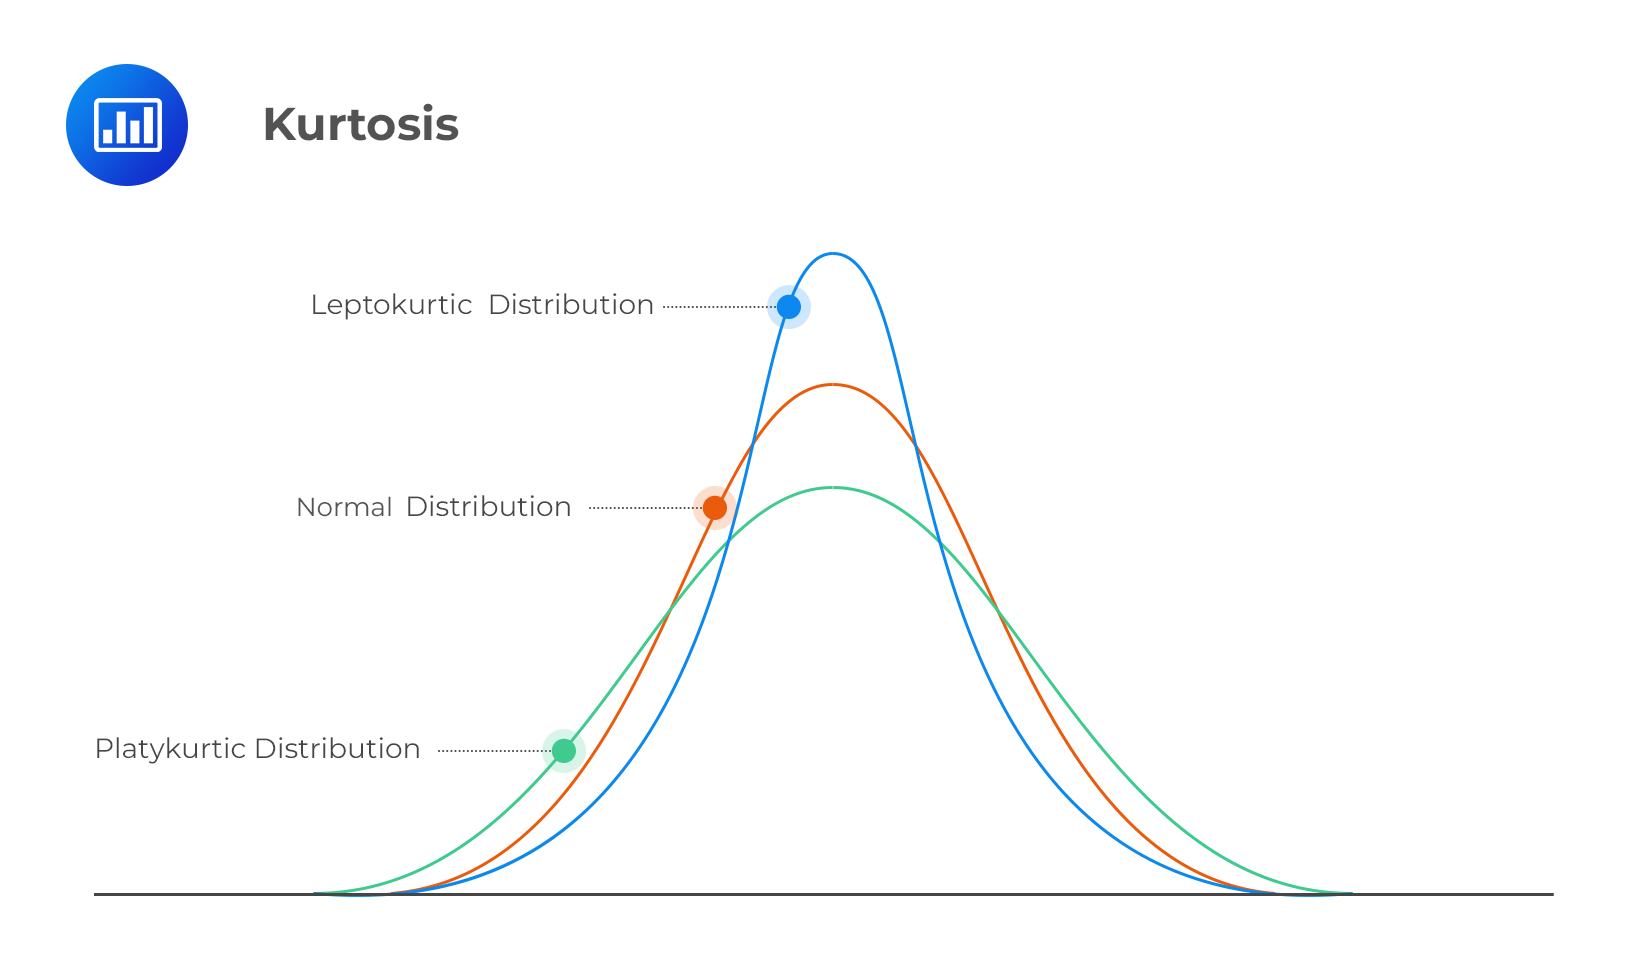

Quality
good    2004
bad     1996
Name: count, dtype: int64


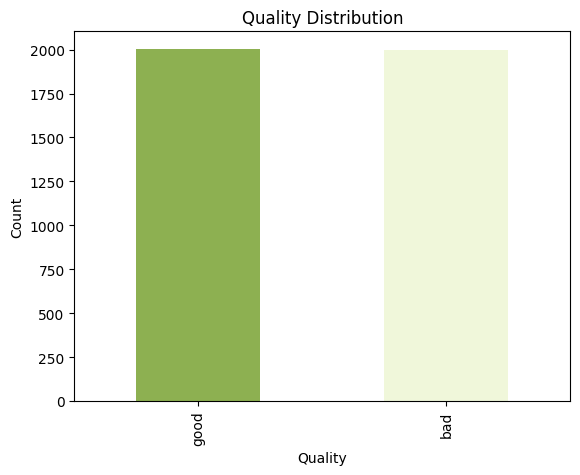

In [ ]:
#Frequency Distribution of the Categorical Column

quality_counts = data['Quality'].value_counts()
print(quality_counts)

quality_counts.plot(kind='bar', title='Quality Distribution', color=['#8db051', '#f0f7da'])
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

<ipython-input-10-04fa35b429b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Quality', y='Size', data=data, palette='Set2')


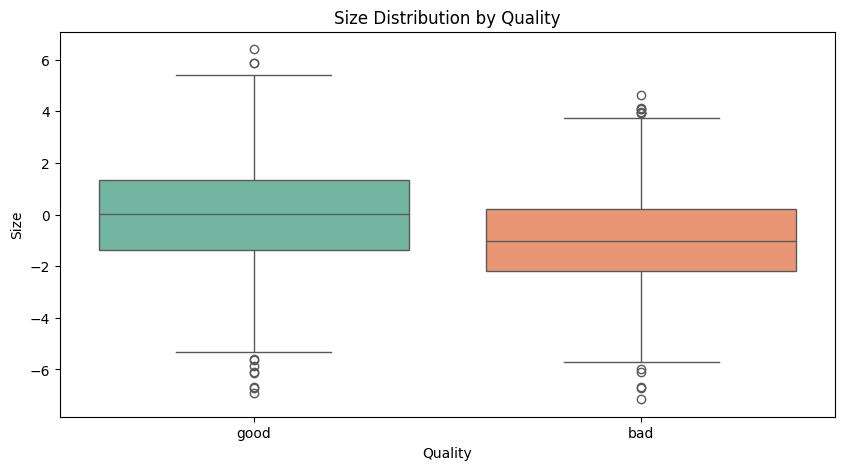

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Quality', y='Size', data=data, palette='Set2')
plt.title('Size Distribution by Quality')
plt.xlabel('Quality')
plt.ylabel('Size')
plt.show()